<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        IMPORTING LIBRARIES
    </h1>
    </div>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,Input
from tensorflow.keras.losses import MeanAbsoluteError,MeanSquaredError
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

In [2]:
def plot_predictions(x_test,pred):
    plt.figure(figsize=(8,6))
    plt.title("Prediction VS Real Values",weight='bold',pad=8,fontsize=16)
    plt.scatter(x_test,y_test,c='b')
    plt.scatter(x_test,pred,c='g',alpha=0.5)
    plt.legend(labels=["True","Predicted"])
    plt.xlabel('X')
    plt.ylabel("Profit")
    plt.show()

In [3]:
train = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

In [4]:
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [5]:
x_train.shape

(793, 5)

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Building ANN
    </h1>
    </div>

In [6]:
model1 = Sequential([Dense(units=200,input_shape=(5,),activation='relu'),
                    Dense(units=100,activation='relu'),
                    Dense(units=50,activation='relu'),
                    Dense(units=1)])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1200      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 26,401
Trainable params: 26,401
Non-trainable params: 0
_________________________________________________________________


In [7]:
model1.compile(optimizer=Adam(learning_rate=0.001),loss=MeanAbsoluteError(),metrics=['mae'])

In [8]:
x_test.shape

(199, 5)

In [9]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [10]:
x_val = x_test[:100,:]
y_val = y_test[:100]
x_test = x_test[100:,:]
y_test = y_test[100:]

In [11]:
history = model1.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=500)

Epoch 1/500
25/25 [==============================] - 1s 12ms/step - loss: 119105.8281 - mae: 119105.8281 - val_loss: 118215.9688 - val_mae: 118215.9688
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 119086.5391 - mae: 119086.5391 - val_loss: 118174.8672 - val_mae: 118174.8672
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 118980.6406 - mae: 118980.6406 - val_loss: 117986.8203 - val_mae: 117986.8203
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 118602.2500 - mae: 118602.2500 - val_loss: 117395.1875 - val_mae: 117395.1875
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 117577.3047 - mae: 117577.3047 - val_loss: 115945.6172 - val_mae: 115945.6172
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 115297.0391 - mae: 115297.0391 - val_loss: 112969.8516 - val_mae: 112969.8516
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 110954.4219 - mae: 1

In [12]:
pred = model1.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [13]:
pca = PCA(n_components=1)

In [14]:
red_x = pca.fit_transform(x_test)

In [15]:
tf.keras.metrics.mae(y_test,pred.flatten())

<tf.Tensor: shape=(), dtype=float32, numpy=324.4974>

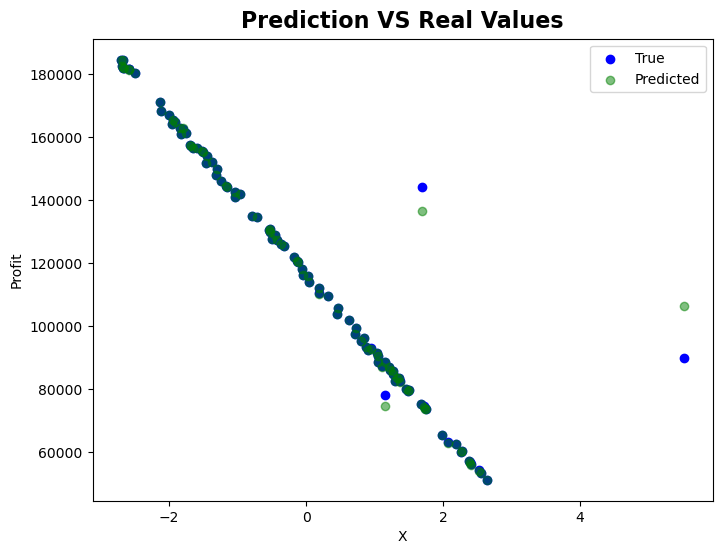

In [16]:
plot_predictions(red_x,pred.flatten())

In [19]:
r2_score(y_test,pred.flatten())

0.997693627777633

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
       Saving the Model
    </h1>
    </div>

In [20]:
model1.save('ann.h5')